In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [46]:
customer_survey_df=pd.read_csv("C:\\data\\work\\Dataset\\customer_survey_new.csv")

In [47]:
customer_survey_df

,Customer ID,Customer Type,Personality,House Size,Key Desires,Future Plan,Main Activity,Budget,Preferred Style,Purchase Frequency,Recommendation Score,Customer Reviews,Suggested Products
0,1,Member,Practical,Large House,Durability,Work from home,Reading,Medium,Cozy,Monthly,42,0.37,"['Rustic Bookshelf', 'Adjustable Standing Desk']"
1,2,Member,Minimalist,Large House,Aesthetic,Travel,Reading,Medium,Modern,Rarely,59,-0.65,"['Storage Organizers', 'Outdoor Patio Chair']"
2,3,Normal,Minimalist,Medium House,Aesthetic,Work from home,Reading,High,Cozy,Rarely,36,0.99,"['Padded Dining Chair', 'Smart Office Desk']"
3,4,Member,Trendy,Large House,Comfort,Relax at home,Watching TV,Medium,Modern,Rarely,54,-0.01,"['Chaise Sofas', '2 Seater sofa']"
4,5,Member,Practical,Medium House,Aesthetic,Work from home,Watching TV,Medium,Minimalist,Monthly,27,0.69,"['Padded Dining Chair', 'Adjustable Standing D..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Normal,Trendy,Large House,Durability,Relax at home,Watching TV,Medium,Luxurious,Rarely,67,-0.14,"['Chaise Sofas', 'Rattan Armchair']"
96,97,Normal,Trendy,Large House,Aesthetic,Work from home,Watching TV,High,Luxurious,Occasionally,54,0.36,"['Padded Dining Chair', 'Adjustable Standing D..."
97,98,Member,Minimalist,Medium House,Durability,Move,Gaming,Medium,Modern,Monthly,85,-0.41,"['Compact Shoe Rack', 'Sliding Door Wardrobe']"
98,99,Normal,Practical,Large House,Comfort,Work from home,Gaming,High,Luxurious,Rarely,24,0.12,"['Adjustable Standing Desk', 'Smart Office Desk']"


In [48]:
column_list=(list(customer_survey_df))
print(column_list)

['Customer ID', 'Customer Type', 'Personality', 'House Size', 'Key Desires', 'Future Plan', 'Main Activity', 'Budget', 'Preferred Style', 'Purchase Frequency', 'Recommendation Score', 'Customer Reviews', 'Suggested Products']


In [49]:
print(customer_survey_df.isnull().sum())

Customer ID             0
Customer Type           0
Personality             0
House Size              0
Key Desires             0
Future Plan             0
Main Activity           0
Budget                  0
Preferred Style         0
Purchase Frequency      0
Recommendation Score    0
Customer Reviews        0
Suggested Products      0
dtype: int64


In [50]:
print("Product Catalog Duplicates:", customer_survey_df.duplicated().sum())

Product Catalog Duplicates: 0


In [51]:
categorical_cols = ["Customer Type", "Budget", "Preferred Style", "Purchase Frequency"]
for col in categorical_cols:
    if col in customer_survey_df.columns:
        customer_survey_df[col] = customer_survey_df[col].str.lower().str.strip()


In [52]:
convert_types = {
    "Recommendation Score": int,
    "Customer Reviews": float
}
for col, dtype in convert_types.items():
    if col in customer_survey_df.columns:
        customer_survey_df[col] = customer_survey_df[col].astype(dtype)

In [53]:
scaler = StandardScaler()
scaled_cols = [ "Customer Reviews"]
customer_survey_df[scaled_cols] = scaler.fit_transform(customer_survey_df[scaled_cols])


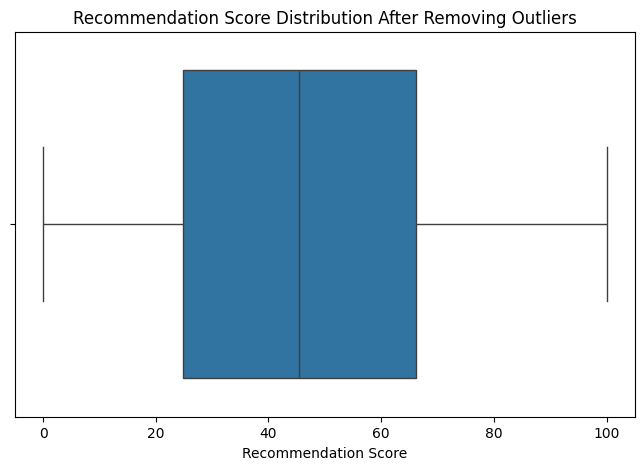

In [54]:
# Visualizing Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=customer_survey_df["Recommendation Score"])
plt.title("Recommendation Score Distribution After Removing Outliers")
plt.show()

In [55]:
#Converting 'Future Plan' into numerical categories 
future_plan_mapping = {"Relax at home": 1, "Work from home": 2, "Move": 3, "Travel": 4}
customer_survey_df["Future_Plan_Score"] = customer_survey_df["Future Plan"].map(future_plan_mapping)

In [56]:
budget_mapping = {"low": 0, "medium": 1, "high": 2}
customer_survey_df["Budget_Score"] = customer_survey_df["Budget"].map(budget_mapping)

# Fill NaN values with the median Budget Score
customer_survey_df["Budget_Score"].fillna(customer_survey_df["Budget_Score"].median(), inplace=True)


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_20136\2100367459.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_survey_df["Budget_Score"].fillna(customer_survey_df["Budget_Score"].median(), inplace=True)


In [57]:
# Converting 'Customer Reviews' sentiment scores into positive/negative classes
customer_survey_df["Review_Sentiment"] = np.where(customer_survey_df["Customer Reviews"] >= 0, 1, 0)

In [58]:
if "Purchase Frequency" in customer_survey_df.columns:
    purchase_freq_mapping = {"rarely": 0, "occasionally": 1, "monthly": 2}
    customer_survey_df["Purchase_Tendency"] = customer_survey_df["Purchase Frequency"].map(purchase_freq_mapping)
    customer_survey_df["Purchase_Tendency"] = customer_survey_df["Purchase_Tendency"].fillna(0)
else:
    print("Purchase Frequency column is missing Setting Purchase_Tendency to 0 for all rows.")
    customer_survey_df["Purchase_Tendency"] = 0  


In [59]:
customer_survey_df["Premium_Buyer"] = 0  # Reset column

customer_survey_df.loc[
    (customer_survey_df["Budget_Score"] == 2) & 
    (customer_survey_df["Preferred Style"] == "luxurious"), 
    "Premium_Buyer"
] = 1




In [60]:
# Encoding Main Activity into numerical categories for better analysis
main_activity_mapping = {"Gaming": 1, "Watching TV": 2, "Reading": 3, "Exercising": 4}
customer_survey_df["Main_Activity_Score"] = customer_survey_df["Main Activity"].map(main_activity_mapping)

In [61]:
#Extracting keyword-based interest score 
customer_survey_df["Interest_Keywords"] = customer_survey_df["Key Desires"].str.lower()


In [62]:
# Converting Customer Review text into numerical sentiment score 
customer_survey_df["Review_Text_Processed"] = customer_survey_df["Customer Reviews"]


In [63]:
#Creating  Preference-based Recommendation Score 
customer_survey_df["Preference_Score"] = (
    customer_survey_df["Budget_Score"] * 0.4 +
    customer_survey_df["Future_Plan_Score"] * 0.3 +
    customer_survey_df["Main_Activity_Score"] * 0.3
)

In [64]:
# Checking if Preference_Score is entirely NaN
if customer_survey_df["Preference_Score"].dropna().empty:
    default_median = 0  
else:
    default_median = customer_survey_df["Preference_Score"].median()

# Filling missing values safely
customer_survey_df["Preference_Score"] = customer_survey_df["Preference_Score"].fillna(default_median)


In [65]:
# Creating Customer Engagement Score 
customer_survey_df["Customer_Engagement_Score"] = (customer_survey_df["Purchase_Tendency"].fillna(0) * 0.5 +customer_survey_df["Recommendation Score"].fillna(customer_survey_df["Recommendation Score"].median()) * 0.5)

In [66]:
#Creating  Low Interest Indicator 
customer_survey_df["Low_Interest_Indicator"] = np.where((customer_survey_df["Purchase_Tendency"] == 0) & (customer_survey_df["Review_Sentiment"] == 0), 1, 0)



In [67]:
# Sentiment from Recommendation Score
customer_survey_df["Sentiment_Score"] = np.where(customer_survey_df["Recommendation Score"] > 50, 1, 0) 



In [68]:
# Engagement-Based Sentiment (Above median = Positive, Below = Negative)
if not customer_survey_df["Customer_Engagement_Score"].dropna().empty:
    median_engagement = customer_survey_df["Customer_Engagement_Score"].median()
else:
    median_engagement = 0  

customer_survey_df["Engagement_Sentiment"] = np.where( customer_survey_df["Customer_Engagement_Score"].fillna(0) > median_engagement, 1, 0)


In [69]:
print(customer_survey_df["Purchase Frequency"].isna().sum())


0


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_20136\3096322938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Budget_Score", data=customer_survey_df, palette="viridis")


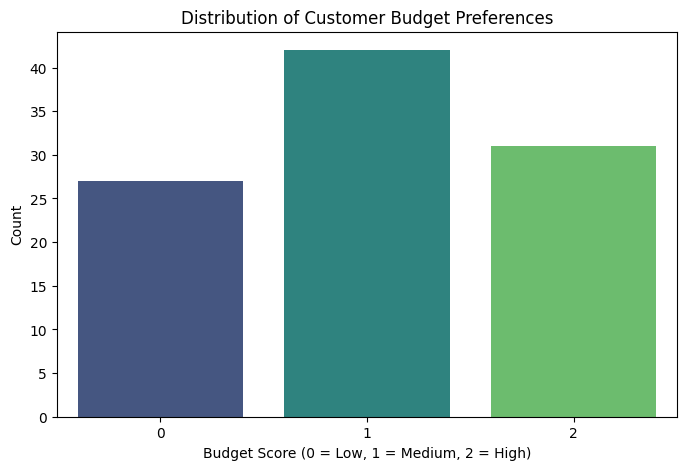

In [70]:
# Distribution of Budget Scores
plt.figure(figsize=(8, 5))
sns.countplot(x="Budget_Score", data=customer_survey_df, palette="viridis")
plt.title("Distribution of Customer Budget Preferences")
plt.xlabel("Budget Score (0 = Low, 1 = Medium, 2 = High)")
plt.ylabel("Count")
plt.show()




In [71]:
# Check for missing values in the dataset
missing_values = customer_survey_df.isna().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("0 Missing Values in the Dataset:\n", missing_values)


0 Missing Values in the Dataset:
 Series([], dtype: int64)


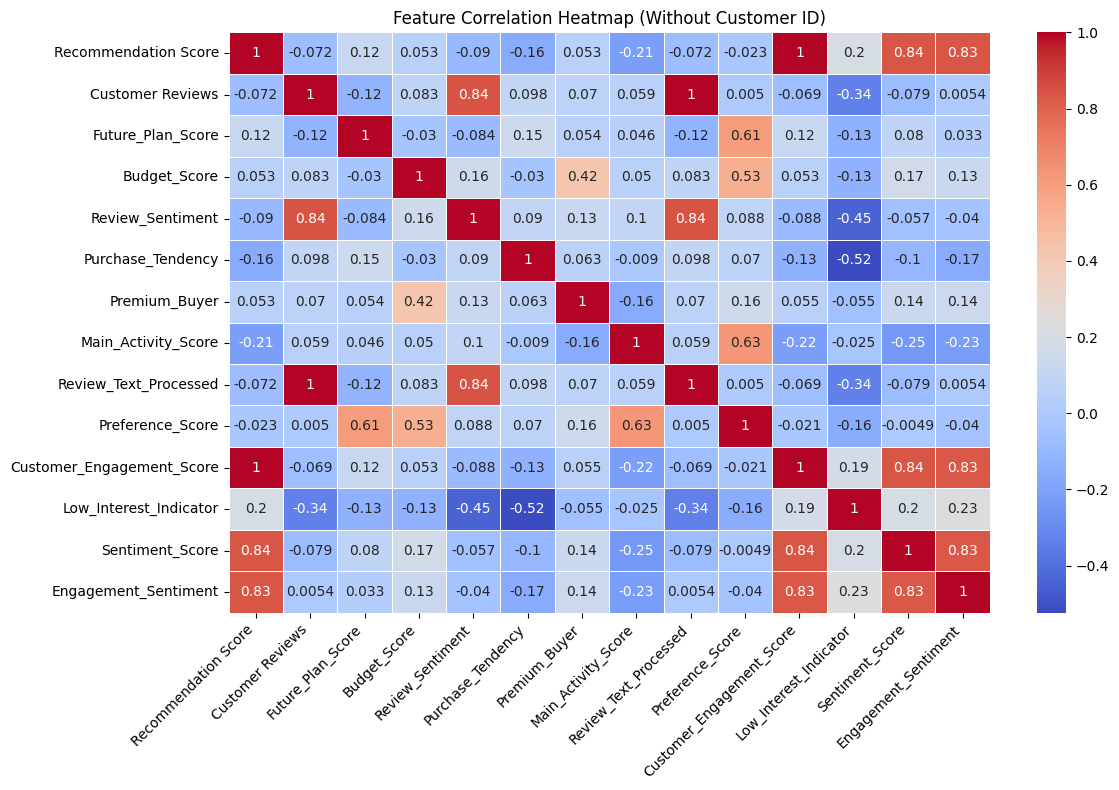

In [72]:
# Dropping customer
valid_numerical_features = customer_survey_df.select_dtypes(include=[np.number]).drop(columns=["Customer ID"]).nunique()
valid_numerical_features = valid_numerical_features[valid_numerical_features > 1].index
corr_matrix = customer_survey_df[valid_numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Without Customer ID)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_20136\2209839490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Future_Plan_Score", y="Budget_Score", data=customer_survey_df, palette="coolwarm")


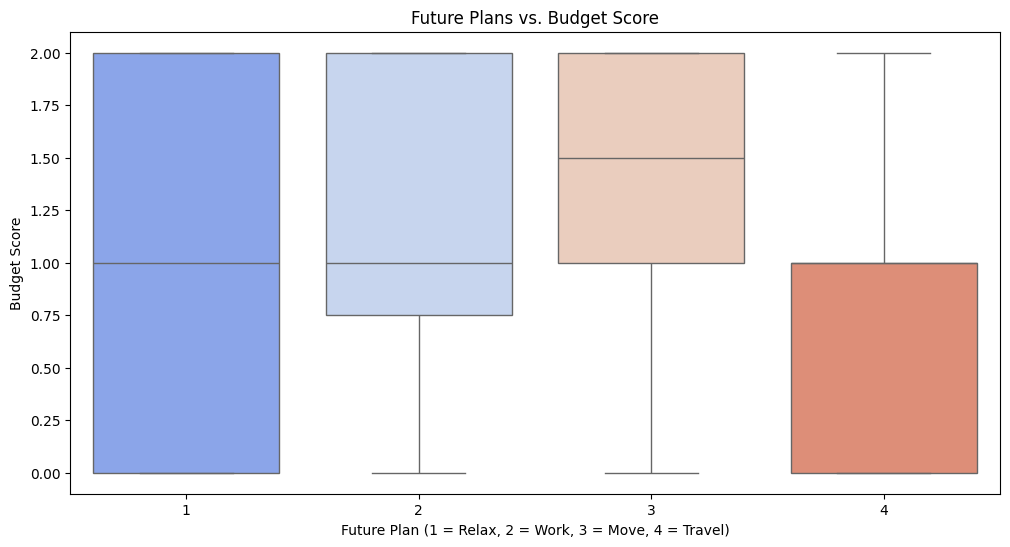

In [73]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Future_Plan_Score", y="Budget_Score", data=customer_survey_df, palette="coolwarm")
plt.title("Future Plans vs. Budget Score")
plt.xlabel("Future Plan (1 = Relax, 2 = Work, 3 = Move, 4 = Travel)")
plt.ylabel("Budget Score")
plt.show()


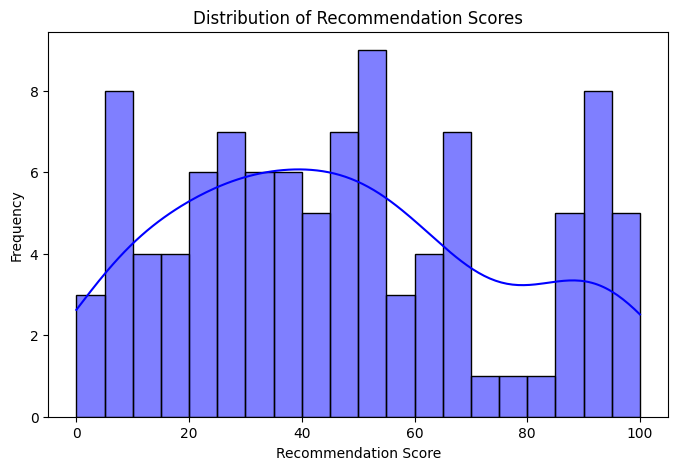

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(customer_survey_df["Recommendation Score"], bins=20, kde=True, color="blue")
plt.title("Distribution of Recommendation Scores")
plt.xlabel("Recommendation Score")
plt.ylabel("Frequency")
plt.show()


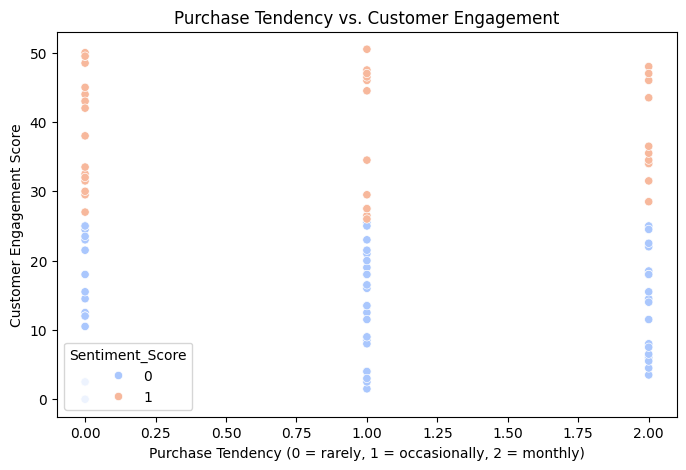

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Purchase_Tendency", y="Customer_Engagement_Score", data=customer_survey_df, hue="Sentiment_Score", palette="coolwarm")
plt.title("Purchase Tendency vs. Customer Engagement")
plt.xlabel("Purchase Tendency (0 = rarely, 1 = occasionally, 2 = monthly)")
plt.ylabel("Customer Engagement Score")
plt.show()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_20136\3351427537.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=sentiment_counts.values, palette="magma", hue=None)


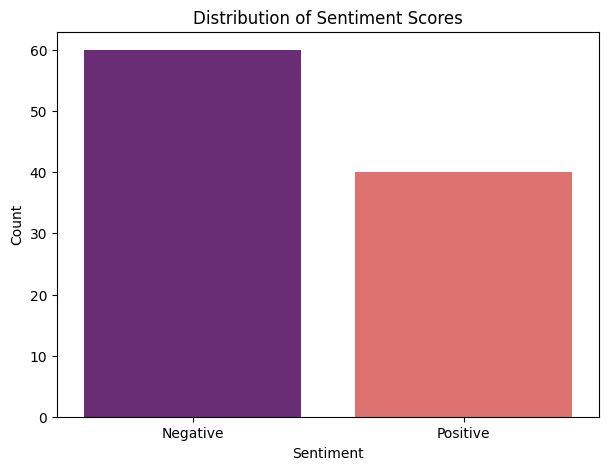

In [76]:
#barplot 

# Making sure there are no NaN values in Sentiment_Score 

sentiment_counts = customer_survey_df["Sentiment_Score"].dropna().value_counts().sort_index() 

# Convert numerical values (0,1) to categorical labels for better readability 
sentiment_labels = ["Negative" if i == 0 else "Positive" for i in sentiment_counts.index] 

plt.figure(figsize=(7, 5)) 

sns.barplot(x=sentiment_labels, y=sentiment_counts.values, palette="magma", hue=None) 

plt.title("Distribution of Sentiment Scores") 

plt.xlabel("Sentiment") 

plt.ylabel("Count") 
plt.show() 

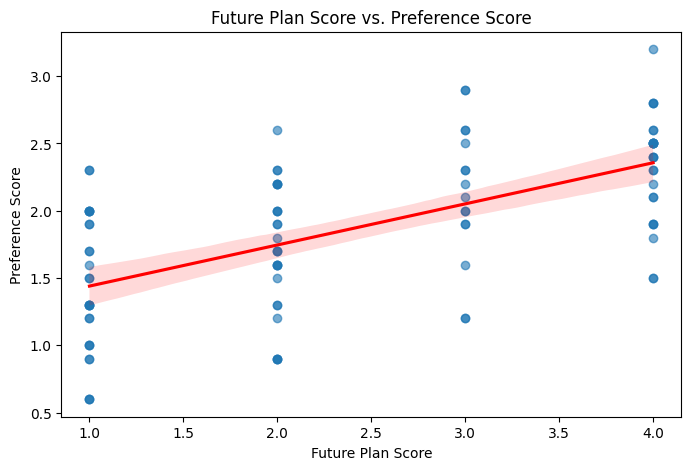

In [77]:
plt.figure(figsize=(8,5))
sns.regplot(x="Future_Plan_Score", y="Preference_Score", data=customer_survey_df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Future Plan Score vs. Preference Score")
plt.xlabel("Future Plan Score")
plt.ylabel("Preference Score")
plt.show()

